## Logistic Regression using ROC Curve and ROC AUC Score

In [5]:
# import required libraries
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [6]:
# Creating the Dataset
X, y=make_classification(n_samples=1000, n_classes=2, n_clusters_per_class=1, random_state=1)

In [7]:
## splitting the data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [23]:
## Lets create a dummy model which gives output as int(0) by default
dummy_model_prob = [0 for _ in range(len(y_test))]

In [24]:
## creating a basic model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [25]:
## prediction based on probabilty
model_prob = model.predict_proba(X_test)

In [26]:
model_prob = model_prob[:, 1]

In [27]:
# Lets calculate the Score
dummy_model_roc = roc_auc_score(y_test, dummy_model)
model_auc = roc_auc_score(y_test, model_prob)

print("Dummy AUC :", dummy_model_roc)
print("Model AUC :", model_auc)

Dummy AUC : 0.5
Model AUC : 0.9600748194014448


### Plotting ROC Curve

Things to keep in mind -  
FPR -> False Positive Rate - How many actual -ves our model wrongly predicted as positive.  
TPR -> True Positive Ratee - how many actual +ves our model correctly identified.  


In [30]:
# importing matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# calculating ROC Curves

## for Dummy model
dummy_FPR, dummy_TPR, _ = roc_curve(y_test, dummy_model_prob) ## _ is always going to be 0

## for Logistic model
model_FPR, model_TPR, thresholds = roc_curve(y_test, model_prob)

In [50]:
thresholds

array([           inf, 9.99987977e-01, 9.08213133e-01, 9.07151424e-01,
       8.69241522e-01, 8.54218885e-01, 8.28062124e-01, 8.22779416e-01,
       7.39076560e-01, 7.14518844e-01, 6.73985409e-01, 6.65663747e-01,
       5.77837241e-01, 5.70185619e-01, 5.67071213e-01, 5.32116827e-01,
       5.17343134e-01, 4.94430344e-01, 4.79071149e-01, 4.72744052e-01,
       4.21434683e-01, 4.18238058e-01, 4.07695341e-01, 4.05407681e-01,
       3.84086170e-01, 3.40561512e-01, 3.32796352e-01, 2.86539182e-01,
       2.72309309e-01, 2.60664182e-01, 2.44940340e-01, 2.44119286e-01,
       2.30328864e-01, 2.08134122e-01, 1.98483075e-01, 1.95858884e-01,
       1.89880829e-01, 1.58363291e-01, 1.50783185e-01, 1.33193502e-01,
       1.16153498e-01, 8.45585658e-02, 8.09639059e-02, 7.22704960e-02,
       6.43635374e-02, 5.54794378e-02, 5.11025560e-02, 8.31907402e-03,
       8.28683723e-03, 1.03107126e-04])

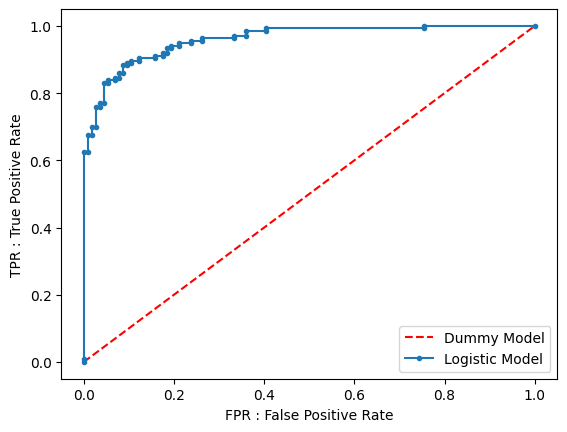

In [48]:
# Plotting the Curve -
plt.plot(dummy_FPR, dummy_TPR, linestyle = "--", color = "r", label = "Dummy Model")
plt.plot(model_FPR, model_TPR, marker = ".", label = "Logistic Model")   

# axis labels
plt.xlabel("FPR : False Positive Rate")
plt.ylabel("TPR : True Positive Rate")

# defining legend
plt.legend()

# showing the plot
plt.show()

#### Some key observations :
- From the above graph, Logistic plot is capturing maximum area under the curve. Therefore, we can conclude that Logistic Model is performing better than our Dummy model.   
- The dotted points which we see in Logistic Model line, is actually Threshold value. Based on Threshold, we calculate our TPR and FPR.   

Now our next task is to select the threshold value such that we get high TPR and low FPR.  

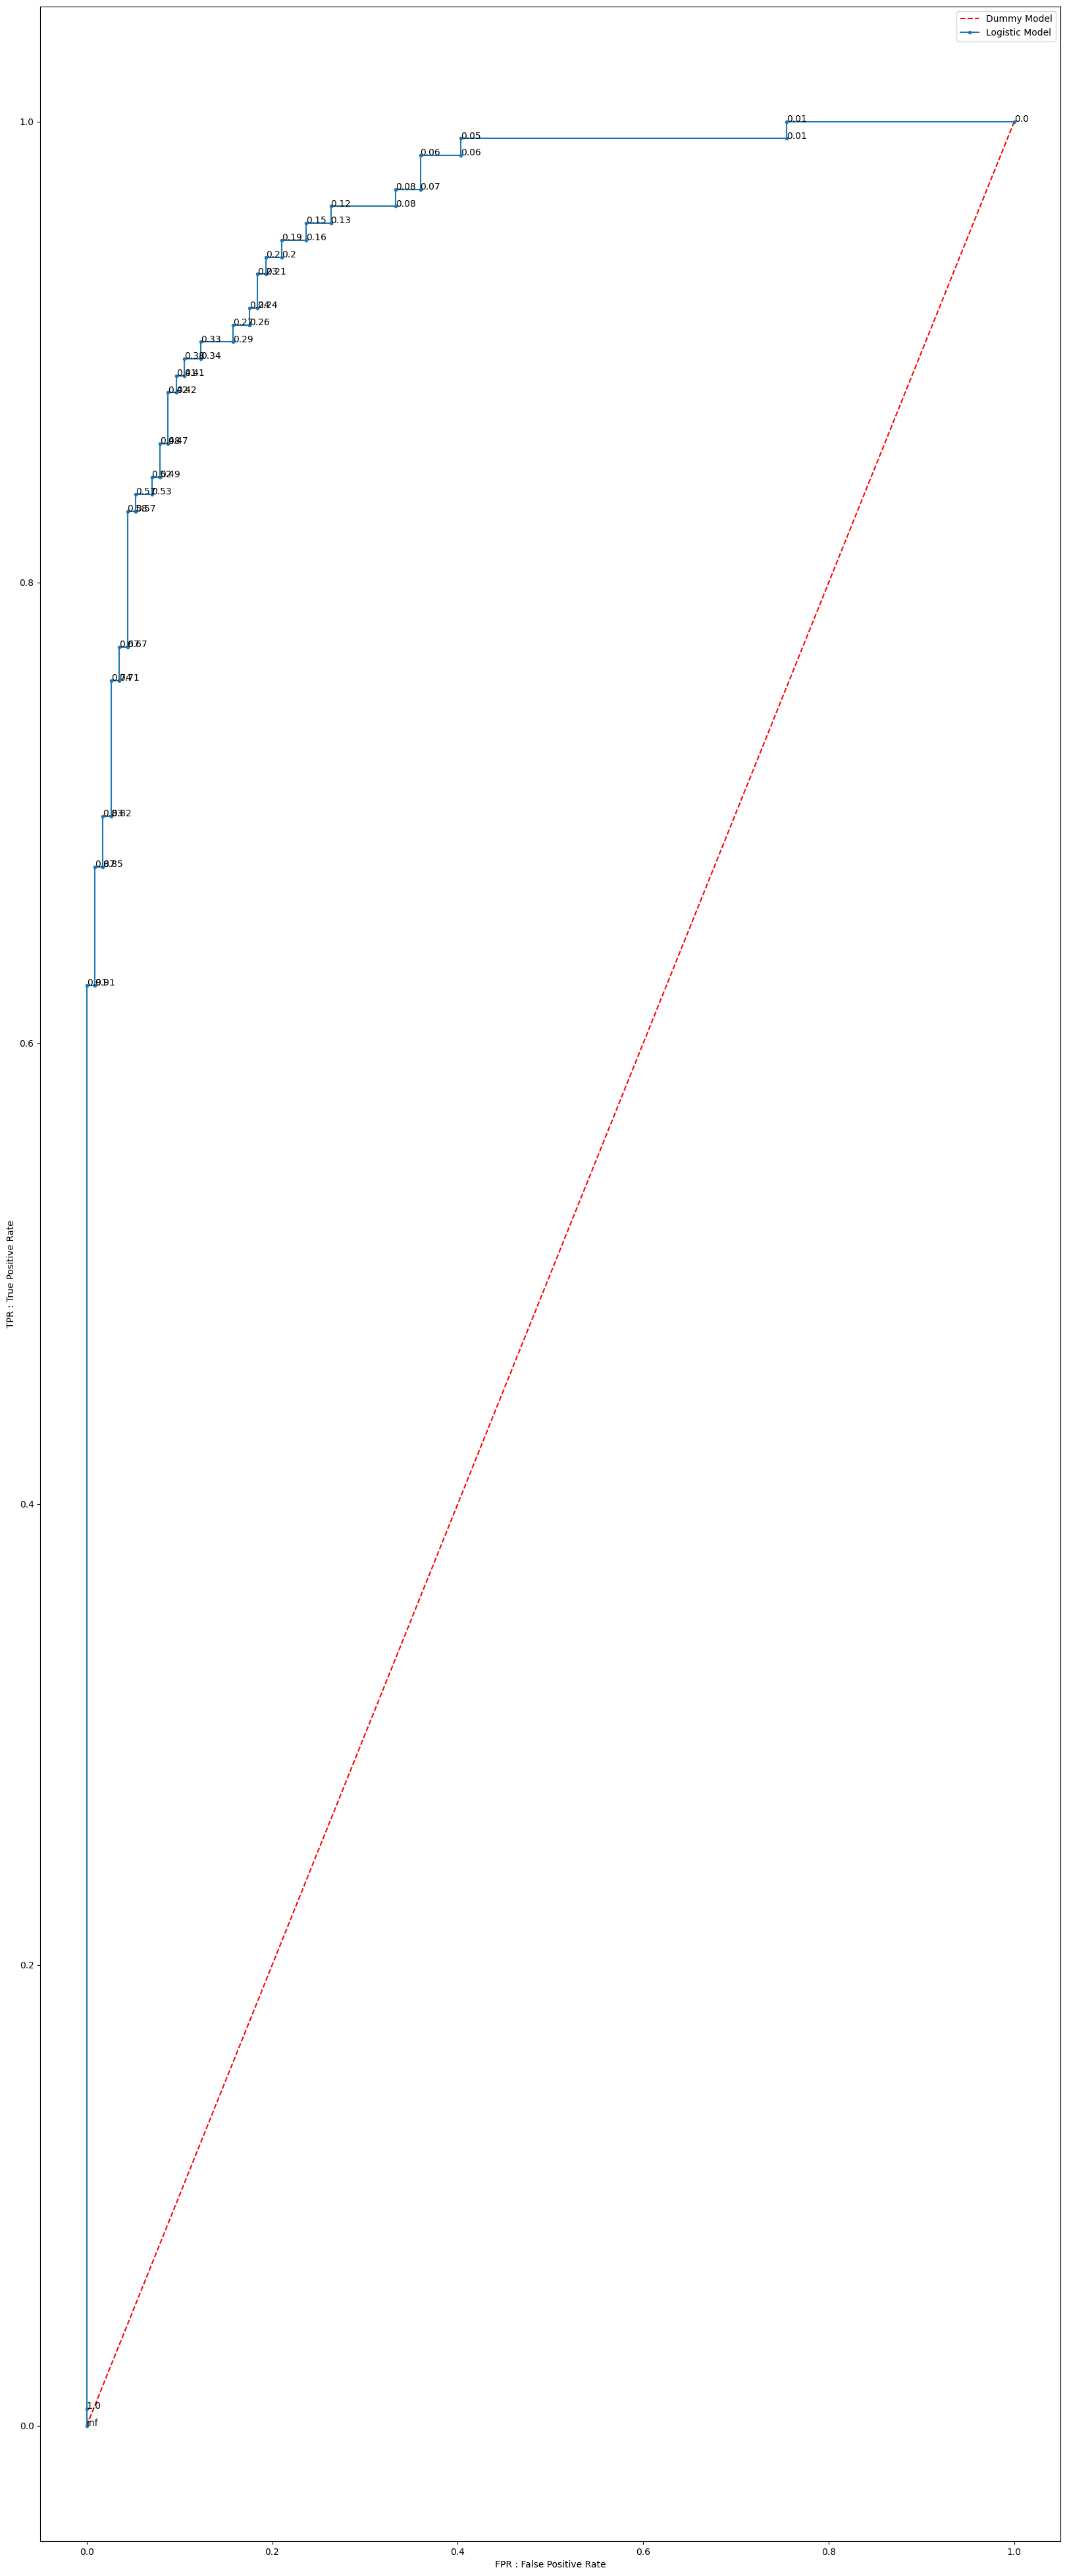

In [53]:
# plot the roc curve for model
import numpy as np
fig = plt.figure(figsize=(20, 50))
ax = fig.add_subplot(111)

# Plotting the Curve -
plt.plot(dummy_FPR, dummy_TPR, linestyle = "--", color = "r", label = "Dummy Model")
plt.plot(model_FPR, model_TPR, marker = ".", label = "Logistic Model")   

for xyz in zip(model_FPR, model_TPR, thresholds):
    ax.annotate("%s" % np.round(xyz[2], 2), xy = (xyz[0], xyz[1]))


# axis labels
plt.xlabel("FPR : False Positive Rate")
plt.ylabel("TPR : True Positive Rate")

# defining legend
plt.legend()

# showing the plot
plt.show()